### Anomalies Detection on Health Insurance Claims

1. Exploratory Data Analysis
    + Features knowledge

EDA driven on Sinister dataset, followed over some assumptions

### Sinister Dataset Analysis

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tools.plotting import scatter_matrix
mpl.style.use('ggplot')
%matplotlib inline

We have to set the asumptions for te main query  
There's some trouble about the connections, after analyzing the training dataset

In [3]:
!pwd

/c/Users/A2276061/Documents/GMM


In [4]:
df = pd.read_csv("Siniestros_Desc.csv", parse_dates=True, encoding="latin1")

In [97]:
import os

file = "C:\\Users\A2276061\Documents\GMM\Siniestros_Desc.csv"
pwd = os.getcwd()
test = pd.read_csv(os.path.basename(file), parse_dates=True, encoding="latin1")
print(pwd)

C:\Users\A2276061\Documents\GMM


In [19]:
#os.path.basename(file)

In [20]:
print(df.head())
#this time we parse from the begining

   NSINIEST  NPOLIZA  RAMSUBRAMO RAMO        SUBRAMO DATE_INIT  INI_ANIO  \
0  16039182     1011        1035  GMM  GMM COLECTIVO  01/08/15         1   
1  17003837   610201        1035  GMM  GMM COLECTIVO  30/09/16         2   
2  16051270   101101        1030  GMM  GMM COLECTIVO  01/05/16         2   
3  16039194    22201        1026  GMM  GMM COLECTIVO  28/09/15         1   
4  16046314    80102        1032  GMM  GMM COLECTIVO  01/04/16         1   

   INDIVIDUAL  EDO STATE_NAME  ...    AGE SINISTER_DATE TIPOSIN  \
0           1   19       N.L.  ...    NaN      16/08/16     300   
1           2   14        JAL  ...    NaN      01/01/12     100   
2           2   11        GTO  ...    NaN      25/11/16     100   
3           2    8       CHIH  ...    NaN      18/08/16     100   
4           2   15      EDMEX  ...    NaN      25/10/16     300   

  SIN_DECRIPTION                                    DIS_DESCRIPTION  COVERS  \
0      ACCIDENTE  RUPTURA DE MENISCO MEDIAL + LISTESIS OSEA R

In [21]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table

In [22]:
missing = missing_values_table(df)
missing = missing[missing['Missing Values'] > 0] #showing only all those are not zero
print(missing)

             Missing Values  % of Total Values
STATE_NAME            23622           9.015033
CITY                  23622           9.015033
CITY_NAME             23622           9.015033
NASEG                     6           0.002290
GENDER                17663           6.740857
CVNFUMA               17663           6.740857
RIESGOCUP             17663           6.740857
CVEDOCIV              17663           6.740857
AGE                   17663           6.740857
COVERS                44887          17.130547
TOTAL_CLAIM           20155           7.691897
TOTAL_PAID            20155           7.691897
DIFF_MOUNT            20155           7.691897


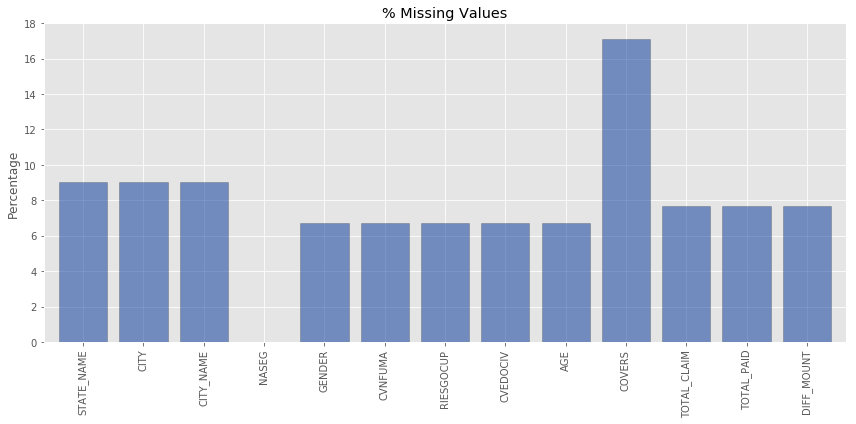

In [23]:
fig = plt.figure(figsize=[12, 6])

ax = missing['% of Total Values'].plot(kind='bar', width=0.8, alpha=0.5, color='#003399', edgecolor='#333333')
ax.yaxis.grid(True)
ax.set_title('% Missing Values')
ax.set_ylabel('Percentage')

fig.tight_layout() #for some reason this line should stay here
plt.show()

As we see the missing values are not gonna represent an important issue for data analysis, we have to decide as well
+ Imputation methods
+ Excusion methods

In [24]:
#Filling Na??
df['COVERS'].fillna(df['COVERS'].mean()).mean()

2.3002919748367736

In [25]:
#columns and data types
df.dtypes 

NSINIEST             int64
NPOLIZA              int64
RAMSUBRAMO           int64
RAMO                object
SUBRAMO             object
DATE_INIT           object
INI_ANIO             int64
INDIVIDUAL           int64
EDO                  int64
STATE_NAME          object
CITY               float64
CITY_NAME           object
NASEG               object
NOMBTIT             object
GENDER             float64
CVNFUMA            float64
RIESGOCUP          float64
CVEDOCIV           float64
AGE                float64
SINISTER_DATE       object
TIPOSIN              int64
SIN_DECRIPTION      object
DIS_DESCRIPTION     object
COVERS             float64
TOTAL_CLAIM        float64
TOTAL_PAID         float64
DIFF_MOUNT         float64
CLAIMS               int64
dtype: object

In [26]:
df_head = df.sort_values(['CLAIMS'], ascending=False).head(20)
print(df_head[['INI_ANIO','CITY_NAME','NOMBTIT','AGE','SINISTER_DATE','SIN_DECRIPTION','TOTAL_PAID','CLAIMS']])

        INI_ANIO         CITY_NAME                              NOMBTIT   AGE  \
9528           5  CIUDAD DE MEXICO                 FELIPE SIADE BARQUET  59.0   
165409         7         MONTERREY                  ALDO GUTIERREZ VEGA  46.0   
31382          6         MONTERREY  DIANA FERNANDA DE LA ROSA RODRIGUEZ   1.0   
95031          1         MONTERREY     ALVARADO QUIROZ FRANCISCO JAVIER  38.0   
69731          1         MONTERREY                 SILVA CHAIREZ FABIAN  29.0   
226153         1       GUADALAJARA                  GARCIA LEAL GERARDO  45.0   
139524         1         MONTERREY          RUBEN DARIO MARTINEZ CASTRO  39.0   
215633         2  CIUDAD DE MEXICO                 FELIPE SIADE BARQUET  56.0   
219437         1         MONTERREY     MARIA DEL SAGRARIO BARREDA PEREZ  54.0   
247177        10     CIUDAD JUAREZ              SAMUEL MIRANDA MARTINEZ  43.0   
21384          2         MONTERREY       GUAJARDO ELIZONDO LUIS GERARDO  47.0   
54371          1         MON

What happen with the cases like FELIPE SIADE BARQUET where we found is showing more than once
+ Let's check the policy number, whats wrong?
+ Why the calculated age is diferent?

In [27]:
df.shape

(262029, 28)

In [28]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
df.describe()

,NSINIEST,NPOLIZA,RAMSUBRAMO,INI_ANIO,INDIVIDUAL,EDO,CITY,GENDER,CVNFUMA,RIESGOCUP,CVEDOCIV,AGE,TIPOSIN,COVERS,TOTAL_CLAIM,TOTAL_PAID,DIFF_MOUNT,CLAIMS
count,2.620e+05,2.620e+05,262029.000,262029.000,262029.000,262029.000,238407.000,244366.000,244366.000,244366.000,244366.000,244366.000,262029.000,217142.000,2.419e+05,2.419e+05,2.419e+05,262029.000
mean,3.215e+07,7.073e+05,9840.941,3.703,1.413,13.598,5.159,1.313,0.115,0.054,0.301,25.394,198.264,2.300,3.263e+06,5.550e+06,8.702e+06,2.639
std,2.419e+08,1.492e+06,13343.930,3.608,0.492,7.541,4.163,0.657,0.319,0.431,0.646,19.355,100.290,1.078,1.322e+07,2.244e+07,3.323e+07,3.873
min,1.100e+02,1.300e+01,110.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,100.000,1.000,1.000e+00,0.000e+00,0.000e+00,1.000
25%,7.028e+06,1.134e+05,1021.000,1.000,1.000,9.000,1.000,1.000,0.000,0.000,0.000,10.000,100.000,1.000,2.410e+05,4.095e+05,6.603e+05,1.000
50%,1.101e+07,2.771e+05,1046.000,2.000,1.000,14.000,6.000,1.000,0.000,0.000,0.000,25.000,200.000,2.000,9.657e+05,1.571e+06,2.559e+06,2.000
75%,1.306e+07,6.242e+05,30041.000,5.000,2.000,19.000,7.000,2.000,0.000,0.000,0.000,39.000,300.000,3.000,2.856e+06,4.749e+06,7.523e+06,3.000
max,3.051e+09,9.970e+06,30053.000,97.000,2.000,33.000,23.000,2.000,2.000,7.000,4.000,113.000,800.000,6.000,1.414e+09,2.416e+09,3.799e+09,276.000


The matrix shape is logical?:
- 1 
- 2 

In [29]:
df['CITY_NAME'].str.upper().value_counts().head(10) #equivalent grouping

MONTERREY           71282
CIUDAD DE MEXICO    60772
GUADALAJARA         16813
AGUASCALIENTES       5226
CIUDAD JUAREZ        5200
QUERETARO            4947
TAMPICO              4725
TORREON              4649
TOLUCA DE LERDO      4398
SALTILLO             4266
Name: CITY_NAME, dtype: int64

In [32]:
#In case we have classes
sin_desc = df.groupby('SIN_DECRIPTION').size()
print(sin_desc)

SIN_DECRIPTION
ACC TRANS        752
ACCIDENTE     112348
DESEMPLEO          3
EMBARAZO       16659
ENFERMEDAD    127810
GTOS.FUNE.        12
INV.TOTAL         52
MA X VIOLE       693
MTE. ACC.       2652
MUERTE           772
PERD.ORG.        271
SUICIDIO           5
dtype: int64


In [38]:
#correlations
numeric_features = df[['INI_ANIO','AGE','COVERS','TOTAL_CLAIM','TOTAL_PAID','DIFF_MOUNT','CLAIMS']]
correlations = numeric_features.corr(method='pearson')
print(correlations)

             INI_ANIO    AGE  COVERS  TOTAL_CLAIM  TOTAL_PAID  DIFF_MOUNT  CLAIMS
INI_ANIO        1.000  0.149   0.088        0.021       0.018       0.020   0.016
AGE             0.149  1.000   0.056        0.158       0.153       0.164   0.204
COVERS          0.088  0.056   1.000       -0.021      -0.024      -0.023   0.036
TOTAL_CLAIM     0.021  0.158  -0.021        1.000       0.967       0.950   0.557
TOTAL_PAID      0.018  0.153  -0.024        0.967       1.000       0.963   0.585
DIFF_MOUNT      0.020  0.164  -0.023        0.950       0.963       1.000   0.594
CLAIMS          0.016  0.204   0.036        0.557       0.585       0.594   1.000


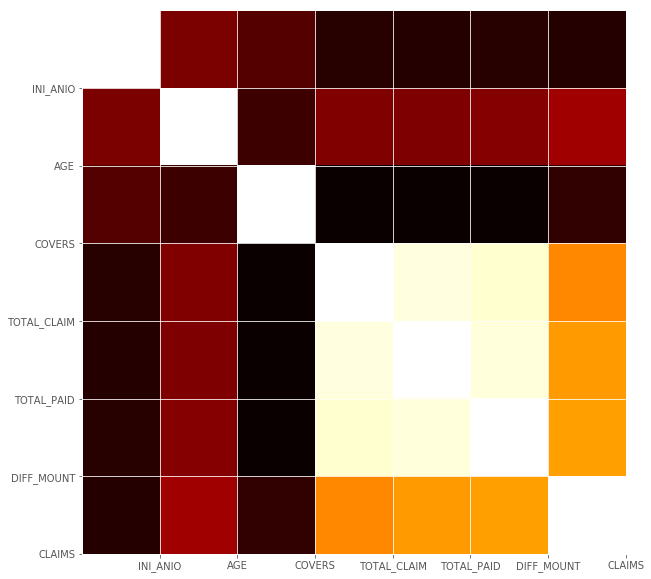

In [40]:
index=list(numeric_features.columns.values)
columns=list(numeric_features.columns.values)

plt.figure(figsize=[10,10])
plt.yticks(np.arange(0.5, len(correlations.index), 1), correlations.index)
plt.xticks(np.arange(0.5, len(correlations.columns), 1), correlations.columns)
plt.imshow(correlations,cmap='hot',interpolation='nearest')
plt.show()

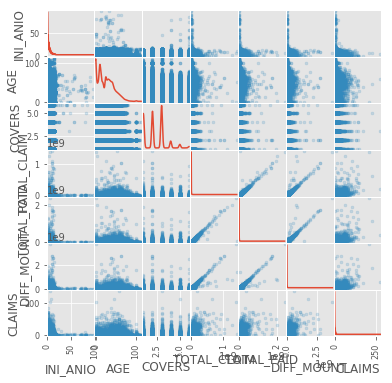

In [60]:
plt.figure(figsize=[10,10])
scatter_matrix(numeric_features, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [41]:
skew = numeric_features.skew()
print(skew)

INI_ANIO        3.010
AGE             0.606
COVERS          0.680
TOTAL_CLAIM    38.438
TOTAL_PAID     36.022
DIFF_MOUNT     33.608
CLAIMS         12.714
dtype: float64


---
Is clear we need to scalate and normalize

##### Time Serires

For this dataset we are analysing the sinisters global, the natural approach is visualize the time series envolved  

The fisrt thing we have to do is convert date fields on data type, because as we see on dtypes is not clear

In [42]:
#Beging of 
df['SINISTER_DATE']=pd.to_datetime(df['SINISTER_DATE'])
df['DATE_INIT']=pd.to_datetime(df['DATE_INIT'])
df.head()

,NSINIEST,NPOLIZA,RAMSUBRAMO,RAMO,SUBRAMO,DATE_INIT,INI_ANIO,INDIVIDUAL,EDO,STATE_NAME,...,AGE,SINISTER_DATE,TIPOSIN,SIN_DECRIPTION,DIS_DESCRIPTION,COVERS,TOTAL_CLAIM,TOTAL_PAID,DIFF_MOUNT,CLAIMS
0,16039182,1011,1035,GMM,GMM COLECTIVO,2015-01-08,1,1,19,N.L.,...,NaN,2016-08-16,300,ACCIDENTE,RUPTURA DE MENISCO MEDIAL + LISTESIS OSEA RODI...,NaN,NaN,NaN,NaN,2
1,17003837,610201,1035,GMM,GMM COLECTIVO,2016-09-30,2,2,14,JAL,...,NaN,2012-01-01,100,ENFERMEDAD,FISTULA ANAL CRIPTOGLANDULAR ...,NaN,NaN,NaN,NaN,2
2,16051270,101101,1030,GMM,GMM COLECTIVO,2016-01-05,2,2,11,GTO,...,NaN,2016-11-25,100,ENFERMEDAD,PARAFIMOSIS Y BALANITIS ...,NaN,NaN,NaN,NaN,6
3,16039194,22201,1026,GMM,GMM COLECTIVO,2015-09-28,1,2,8,CHIH,...,NaN,2016-08-18,100,ENFERMEDAD,SD PINZAMIENTO + TENDINOSIS PORCION LARGA DE B...,NaN,NaN,NaN,NaN,3
4,16046314,80102,1032,GMM,GMM COLECTIVO,2016-01-04,1,2,15,EDMEX,...,NaN,2016-10-25,300,ACCIDENTE,DESGARRO DEL MENISCO MEDIAL ...,NaN,NaN,NaN,NaN,2


In [43]:
df[['SINISTER_DATE','DATE_INIT']].dtypes

SINISTER_DATE    datetime64[ns]
DATE_INIT        datetime64[ns]
dtype: object

In [44]:
#take the fisrt column . groupby () and measure of aggregation
# like agg(['mean', 'count'])
dfy = df['NSINIEST'].groupby(df['SINISTER_DATE'].map(lambda x: x.year)).agg(['count'])
print(dfy.head())

               count
SINISTER_DATE       
2000             546
2001            4784
2002            5021
2003            5148
2004            7511


In [45]:
#test[['NSINIEST','AGE']].groupby(test['SINISTER_DATE'].map(lambda x: x.year)).agg(['count','mean'])
#this is just another approach of agregation

In [46]:
dfy.columns
dfy.dtypes

count    int64
dtype: object

In [47]:
#The rule we gonna use is excluding all the data with days more than 2 estandart deviatin_
two_dev = 2*dfy.std().astype(int)
two_dev

count    16968
dtype: int32

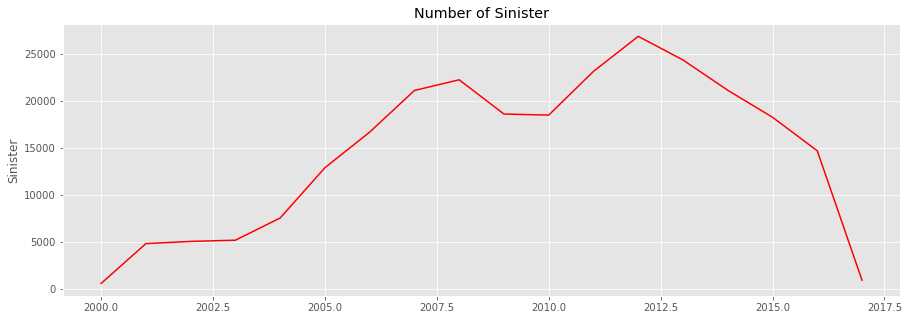

In [48]:
plt.figure(figsize=[15, 5])
plt.plot(dfy, color='red') 
plt.title("Number of Sinister")
plt.ylabel('Sinister')
plt.show()

+ Can we find something seasonal?
+ Sinister by month it matters? Let's make a plot by month

In [49]:
dfm = df['NSINIEST'].groupby(df['SINISTER_DATE'].map(lambda x: x.month)).agg(['count'])
print(dfm.head())

               count
SINISTER_DATE       
1              30094
2              21938
3              22344
4              21623
5              24100


In [50]:
two_dev = 2*dfy.std().astype(int)
two_dev

count    16968
dtype: int32

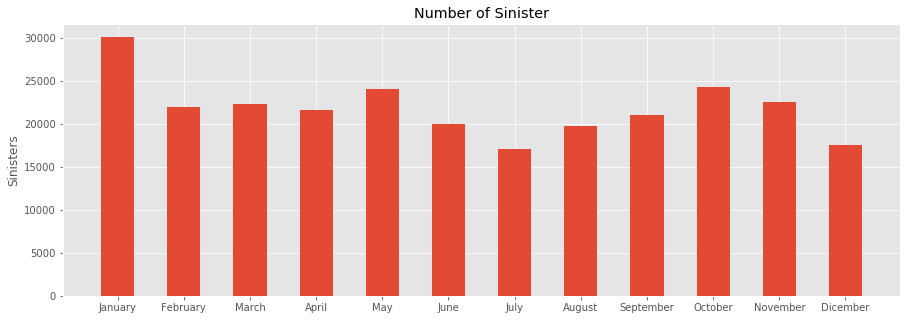

In [51]:
plt.figure(figsize=[15,5])
axx=np.arange(dfm.count())
plt.xticks(axx, ('January', 'February', 'March', 'April', 'May', 
            'June', 'July', 'August', 'September', 'October', 'November', 'Dicember'))
plt.ylabel('Sinisters')
plt.title('Number of Sinister')
plt.bar(axx, dfm['count'], width=.5)
plt.show()

The best approach is convert this to series, and take out the outliers

In [52]:
#df_dates = df.groupby(df['SINISTER_DATE'].apply(lambda x : x.date()))
#df_dates['SINISTER_DATE'].aggregate(len)

df_dates = df['NSINIEST'].groupby(df['SINISTER_DATE'].map(lambda x: x.date())).agg(['count'])
print(df_dates.head())

               count
SINISTER_DATE       
2000-01-01        12
2000-01-02         3
2000-01-03         3
2000-01-04         7
2000-01-05         4


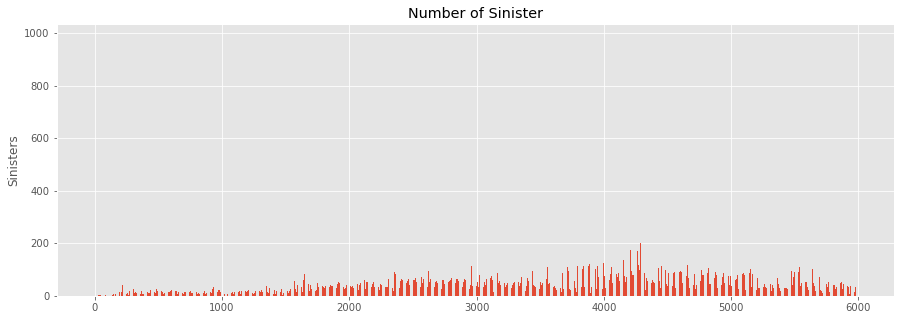

In [205]:
plt.figure(figsize=[15,5])
plt.ylabel('Sinisters')
plt.title('Number of Sinister')
plt.bar(np.arange(df_dates.count()), df_dates['count'], width=.5)
plt.show()

In [54]:
df_dates.describe()

,count
count,5979.000
mean,43.825
std,36.490
min,1.000
25%,20.000
50%,38.000
75%,60.000
max,986.000


First of all, the mean changes a lot